Load the data in the files - depositsdata_a2.csv and betsdata_a2.csv


Tasks:


Q1 - What is the weekly bet retention of customers? Week 1 is the week in which the customer has placed the first bet. For example, if a customer placed a bet on 01/01/2021, that week becomes his first week. We want to see if the customers in their week 1, carry forward and place a bet in week 2 and 3 and so on. 

Do this for all the players who have placed a bet in the respective weeks of the calendar year, and see if they continue to the next week and place a bet again.


*Note: The bet retention for each customer has to be calculated from the first bet date. Show the output as a heatmap with annotations and your heatmap should be triangular in the end. Refer to the image attached below to understand how a triangular dataset for retention looks like.*


Q2 - What are the first & last touch points of all the customers in the system (eg: first channel, first deposit amount, last bet, last deposit, last channel etc.) Store the data for each customer at a customer level in a separate table and call it "first_touch_point" & "last_touch_point".

*Note: We want you to extract the first entry in the system in the bets and deposits data for each customer (common) and put them in a separate table. So each customer has one unique entry with all their first touch points and similarly a second table with a unique entry for all their last touch points.*


Q3 - Find out the Cash bet amount for each customer (i.e. at a customer level) and store the same in a separate table:

1. Day 1 to Day 3 i.e. Total Cash Bet amount in the first 3 days
2. Day 4 to Day 7 i.e. Total Cash Bet amount in the next 4 days and so on
3. Day 8 to Day 14
4. Day 15 to Day 28
5. Beyond Day 28 till date

*Note: Day 1 (base date) in task Q3 is the first deposit date of the customer. Ideally, from the time the customer has placed his first deposit, we want to see the bet amount he's placing in his lifetime for the first 3 days, the next 4 days and so on as mentioned above.*

Use the following column to calculate the first deposit date for a customer - TIMESTAMP_IU


In [1]:
## A triangular data looks like the image given below (for question Q1)

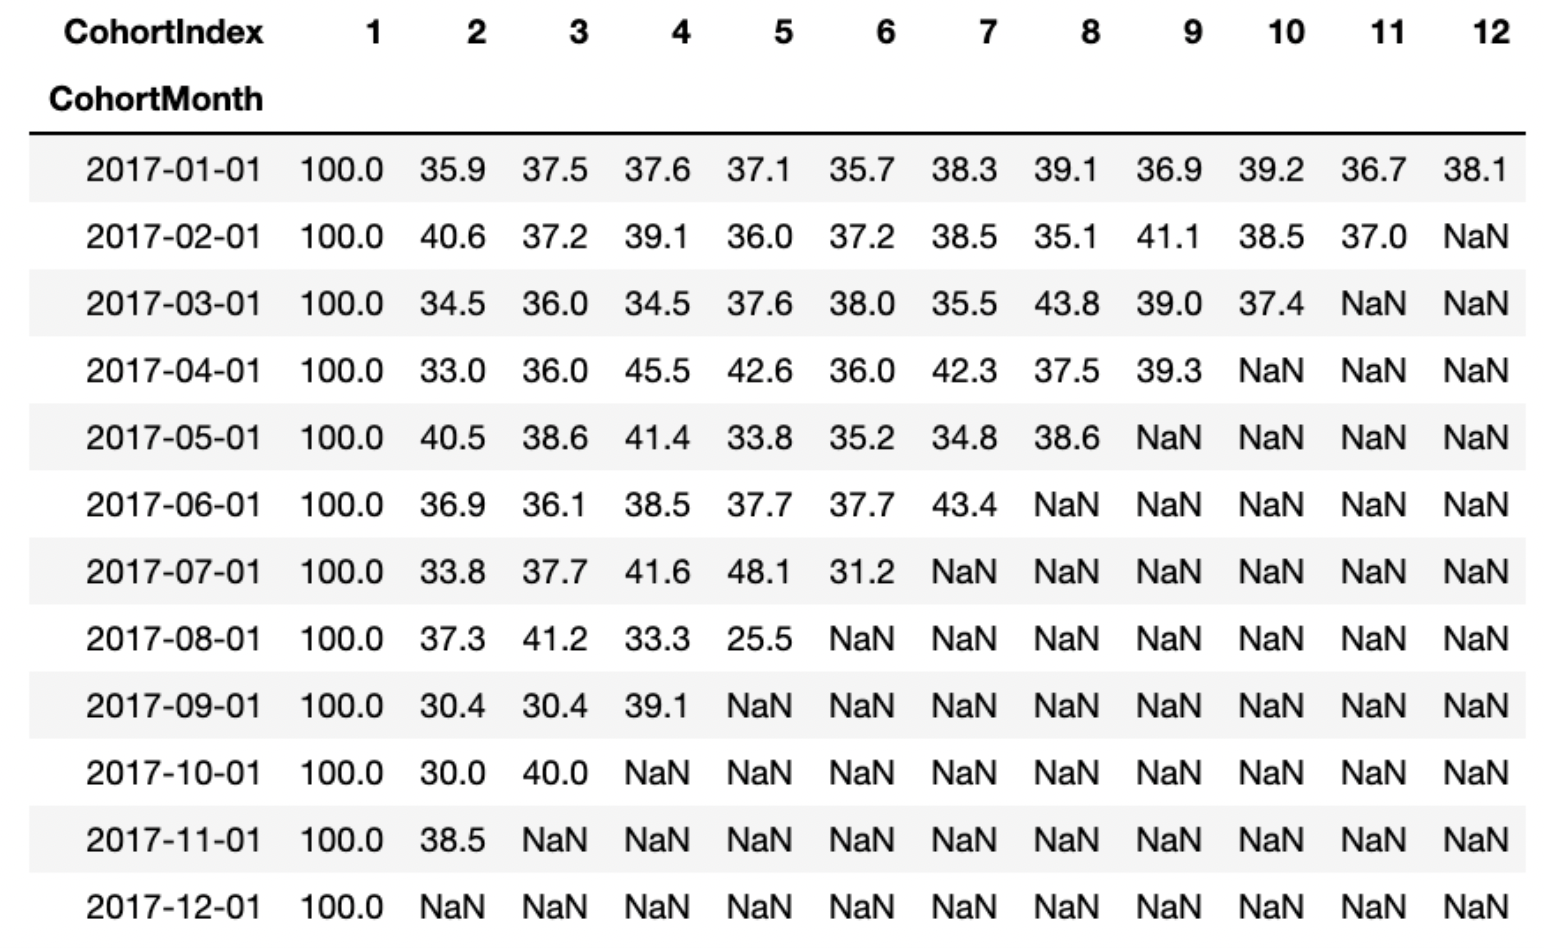

In [2]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
# Importing both databases and parsing the datetime values 
# day value is first in all the three date columns
df1 = pd.read_csv("depositsdata_a2.csv", parse_dates = ["TIMESTAMP", "TIMESTAMP_IU"], dayfirst = True)
df2 = pd.read_csv("betsdata_a2.csv", parse_dates = ["BET_DATE"], dayfirst = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_324\91245896.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv("depositsdata_a2.csv", parse_dates = ["TIMESTAMP", "TIMESTAMP_IU"], dayfirst = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_324\91245896.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1 = pd.read_csv("depositsdata_a2.csv", parse_dates = ["TIMESTAMP", "TIMESTAMP_IU"], dayfirst = True)
C:\Users\hp\AppData\Local\Temp\ipykernel_324\91245896.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv("betsdata_a2.csv", parse_dates = ["BET

In [4]:
df1.head()

,DOMAIN,AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,WEB_MOBILE_CHANNEL
0,BETBOO_TR,100.0,TRY,14433780,2022-01-01 17:18:00,2022-01-01,MOB
1,BETBOO_TR,1000.0,TRY,14195107,2022-01-01 17:50:00,2022-01-01,MOB
2,BETBOO_TR,300.0,TRY,13712463,2022-01-01 17:16:00,2022-01-01,MOB
3,BETBOO_TR,100.0,TRY,14194337,2022-01-01 17:53:00,2022-01-01,MOB
4,BETBOO_TR,100.0,TRY,8367854,2022-01-01 17:02:00,2022-01-01,WEB


In [5]:
df2.head()

,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,PLATFORM,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,...,PRODUCT_VARIANT,EVENT,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST
0,2022-04-11,13567011,SPORTSBOOK,MOBILE,NaN,LIVE,Football,1,L,LIVE,...,Single,Inter Miami II v Orlando City II,USA - Reserves,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,11-May,TRY,0.0
1,2022-04-11,11472902,SPORTSBOOK,MOBILE,NaN,LIVE,Football,1,S,LIVE,...,Single,Sao Paulo FC SP v CA Paranaense PR,Brazil - Serie A,1st Half Result,1st Half - Result,1st Half - Result,Sao Paulo FC SP,07-May,TRY,0.0
2,2022-04-11,14396942,SPORTSBOOK,MOBILE,NaN,LIVE,Football,1,L,LIVE,...,Single,Fenerbahce Istanbul (Cliff) v Galatasaray (Moic),Esoccer - (12 Mins),1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,06-Apr,TRY,0.0
3,2022-04-11,148063171,SPORTSBOOK,WEB,NaN,LIVE,Football,1,W,LIVE,...,Single,CA River Plate v Argentinos Juniors,Argentina - Copa de la Liga,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,21/20,TRY,0.0
4,2022-04-11,12581903,SPORTSBOOK,MOBILE,NaN,LIVE,Football,1,W,LIVE,...,Single,Achuapa (Reserves) v Comunicaciones (Reserves),Guatemala - Reserves,Full Time Total Goals,Total Goals,Total Goals,Over,01-Jan,TRY,0.0


### Q1 - What is the weekly bet retention of customers? Week 1 is the week in which the customer has placed the first bet. For example, if a customer placed a bet on 01/01/2021, that week becomes his first week. We want to see if the customers in their week 1, carry forward and place a bet in week 2 and 3 and so on.

In [6]:
# Checking for null values
df2.isnull().sum()

BET_DATE                   0
PLAYER_ID                  0
PRODUCT                    0
CHANNEL                    0
PLATFORM              983042
GAME_CATEGORY              0
GAME_NAME                  0
BET_COUNT                  0
BET_STATUS                 0
PRODUCT_EXPERIENCE         0
CASH_BET_AMOUNT            0
CASH_WIN_AMOUNT            0
CASH_MARGIN                0
BONUS_BET_AMOUNT           0
BONUS_WIN_AMOUNT           0
BONUS_MARGIN               0
PRODUCT_VARIANT            0
EVENT                 400609
EVENT_GROUP           400609
MARKET_TYPE           400609
MARKET                400609
SUB_MARKET            400609
SELECTION             400613
PRICE                 400609
CURRENCY_ID                0
BONUS_COST                 0
dtype: int64

In [7]:
# dropped the PLATFORM column because all the values are Nan
df2.drop(['PLATFORM'], axis = 1, inplace = True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983042 entries, 0 to 983041
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   BET_DATE            983042 non-null  datetime64[ns]
 1   PLAYER_ID           983042 non-null  int64         
 2   PRODUCT             983042 non-null  object        
 3   CHANNEL             983042 non-null  object        
 4   GAME_CATEGORY       983042 non-null  object        
 5   GAME_NAME           983042 non-null  object        
 6   BET_COUNT           983042 non-null  int64         
 7   BET_STATUS          983042 non-null  object        
 8   PRODUCT_EXPERIENCE  983042 non-null  object        
 9   CASH_BET_AMOUNT     983042 non-null  float64       
 10  CASH_WIN_AMOUNT     983042 non-null  float64       
 11  CASH_MARGIN         983042 non-null  float64       
 12  BONUS_BET_AMOUNT    983042 non-null  float64       
 13  BONUS_WIN_AMOUNT    983042 no

In [9]:
df2["BET_DATE"].value_counts()

BET_DATE
2022-01-22    13818
2022-02-20    13140
2022-03-20    12841
2022-01-23    12655
2022-02-19    12481
              ...  
2022-04-21     5358
2022-04-26     5206
2022-03-22     4735
2022-03-31     4657
2022-03-23     4591
Name: count, Length: 120, dtype: int64

In [10]:
# Adding a column for week start date in which the bet was placed
df2['BET_WEEK'] = df2['BET_DATE'].dt.to_period('W').apply(lambda x: x.start_time)

In [11]:
df2

,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,CASH_BET_AMOUNT,...,EVENT,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST,BET_WEEK
0,2022-04-11,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Inter Miami II v Orlando City II,USA - Reserves,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,11-May,TRY,0.0,2022-04-11
1,2022-04-11,11472902,SPORTSBOOK,MOBILE,LIVE,Football,1,S,LIVE,62.08963,...,Sao Paulo FC SP v CA Paranaense PR,Brazil - Serie A,1st Half Result,1st Half - Result,1st Half - Result,Sao Paulo FC SP,07-May,TRY,0.0,2022-04-11
2,2022-04-11,14396942,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,1.55224,...,Fenerbahce Istanbul (Cliff) v Galatasaray (Moic),Esoccer - (12 Mins),1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,06-Apr,TRY,0.0,2022-04-11
3,2022-04-11,148063171,SPORTSBOOK,WEB,LIVE,Football,1,W,LIVE,0.12418,...,CA River Plate v Argentinos Juniors,Argentina - Copa de la Liga,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,21/20,TRY,0.0,2022-04-11
4,2022-04-11,12581903,SPORTSBOOK,MOBILE,LIVE,Football,1,W,LIVE,31.04481,...,Achuapa (Reserves) v Comunicaciones (Reserves),Guatemala - Reserves,Full Time Total Goals,Total Goals,Total Goals,Over,01-Jan,TRY,0.0,2022-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983037,2022-04-10,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Real Tomayapo v Blooming Guayaramerin,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,10-Jan,TRY,0.0,2022-04-04
983038,2022-04-10,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Real Tomayapo v Blooming Guayaramerin,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,19-Apr,TRY,0.0,2022-04-04
983039,2022-04-10,11016063,SPORTSBOOK,MOBILE,LIVE,Football,19,L,LIVE,3.10448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.0,2022-04-04
983040,2022-04-10,13659322,SPORTSBOOK,MOBILE,LIVE,Football,1,O,LIVE,31.04481,...,Union Espanola v Colo-Colo,Chile - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,06-Apr,TRY,0.0,2022-04-04


In [12]:
# Adding the FIRST_BET column, the week in which the first bet was placed
dff2 = df2.groupby("PLAYER_ID")["BET_WEEK"]
df2['FIRST_BET'] = dff2.transform('min')
df2

,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,CASH_BET_AMOUNT,...,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST,BET_WEEK,FIRST_BET
0,2022-04-11,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,USA - Reserves,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,11-May,TRY,0.0,2022-04-11,2021-12-27
1,2022-04-11,11472902,SPORTSBOOK,MOBILE,LIVE,Football,1,S,LIVE,62.08963,...,Brazil - Serie A,1st Half Result,1st Half - Result,1st Half - Result,Sao Paulo FC SP,07-May,TRY,0.0,2022-04-11,2021-12-27
2,2022-04-11,14396942,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,1.55224,...,Esoccer - (12 Mins),1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,06-Apr,TRY,0.0,2022-04-11,2021-12-27
3,2022-04-11,148063171,SPORTSBOOK,WEB,LIVE,Football,1,W,LIVE,0.12418,...,Argentina - Copa de la Liga,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,21/20,TRY,0.0,2022-04-11,2022-01-24
4,2022-04-11,12581903,SPORTSBOOK,MOBILE,LIVE,Football,1,W,LIVE,31.04481,...,Guatemala - Reserves,Full Time Total Goals,Total Goals,Total Goals,Over,01-Jan,TRY,0.0,2022-04-11,2021-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983037,2022-04-10,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,10-Jan,TRY,0.0,2022-04-04,2021-12-27
983038,2022-04-10,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,19-Apr,TRY,0.0,2022-04-04,2021-12-27
983039,2022-04-10,11016063,SPORTSBOOK,MOBILE,LIVE,Football,19,L,LIVE,3.10448,...,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.0,2022-04-04,2021-12-27
983040,2022-04-10,13659322,SPORTSBOOK,MOBILE,LIVE,Football,1,O,LIVE,31.04481,...,Chile - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,06-Apr,TRY,0.0,2022-04-04,2021-12-27


In [13]:
# Adding the Week column- the week no. in which the bet was placed
df2['WEEK'] = (df2['BET_WEEK'] - df2["FIRST_BET"]) / np.timedelta64(1, 'W') + 1 

In [14]:
# creating retention data for all customers from their first week
grouping_count = df2.groupby(['FIRST_BET', 'WEEK'])
cohort_data = grouping_count['PLAYER_ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [15]:
# Creating pivot table for retention data
cohort_counts = cohort_data.pivot(index='FIRST_BET',
                                  columns='WEEK',
                                  values='PLAYER_ID')
cohort_counts.columns = range(1,19)
cohort_counts.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FIRST_BET,,,,,,,,,,,,,,,,,,
2021-12-27,1002.0,803.0,742.0,753.0,662.0,648.0,636.0,608.0,614.0,624.0,594.0,611.0,562.0,583.0,581.0,555.0,551.0,536.0
2022-01-03,568.0,343.0,302.0,260.0,231.0,250.0,227.0,246.0,243.0,221.0,218.0,208.0,213.0,205.0,205.0,208.0,203.0,NaN
2022-01-10,233.0,129.0,97.0,87.0,83.0,80.0,79.0,79.0,71.0,73.0,56.0,62.0,56.0,57.0,62.0,65.0,NaN,NaN
2022-01-17,242.0,83.0,53.0,48.0,49.0,49.0,76.0,53.0,50.0,35.0,55.0,54.0,42.0,58.0,74.0,NaN,NaN,NaN
2022-01-24,114.0,41.0,29.0,28.0,26.0,20.0,25.0,17.0,17.0,22.0,19.0,14.0,21.0,17.0,NaN,NaN,NaN,NaN


In [16]:
# Getting retention percentage
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(3) * 100
retention.index = retention.index.strftime('%d-%m-%Y')

In [17]:
retention

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FIRST_BET,,,,,,,,,,,,,,,,,,
27-12-2021,1.0,0.801397,0.740519,0.751497,0.660679,0.646707,0.634731,0.606786,0.612774,0.622754,0.592814,0.609780,0.560878,0.581836,0.579840,0.553892,0.549900,0.53493
03-01-2022,1.0,0.603873,0.531690,0.457746,0.406690,0.440141,0.399648,0.433099,0.427817,0.389085,0.383803,0.366197,0.375000,0.360915,0.360915,0.366197,0.357394,NaN
10-01-2022,1.0,0.553648,0.416309,0.373391,0.356223,0.343348,0.339056,0.339056,0.304721,0.313305,0.240343,0.266094,0.240343,0.244635,0.266094,0.278970,NaN,NaN
17-01-2022,1.0,0.342975,0.219008,0.198347,0.202479,0.202479,0.314050,0.219008,0.206612,0.144628,0.227273,0.223140,0.173554,0.239669,0.305785,NaN,NaN,NaN
24-01-2022,1.0,0.359649,0.254386,0.245614,0.228070,0.175439,0.219298,0.149123,0.149123,0.192982,0.166667,0.122807,0.184211,0.149123,NaN,NaN,NaN,NaN
31-01-2022,1.0,0.352941,0.294118,0.176471,0.323529,0.323529,0.147059,0.117647,0.147059,0.147059,0.147059,0.147059,0.205882,NaN,NaN,NaN,NaN,NaN
07-02-2022,1.0,0.181818,0.090909,0.363636,0.272727,0.181818,0.272727,0.090909,0.454545,0.363636,0.181818,0.090909,NaN,NaN,NaN,NaN,NaN,NaN
14-02-2022,1.0,0.473684,0.315789,0.263158,0.263158,0.263158,0.210526,0.368421,0.263158,0.368421,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21-02-2022,1.0,0.222222,0.222222,0.166667,0.222222,0.222222,0.277778,0.166667,0.166667,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


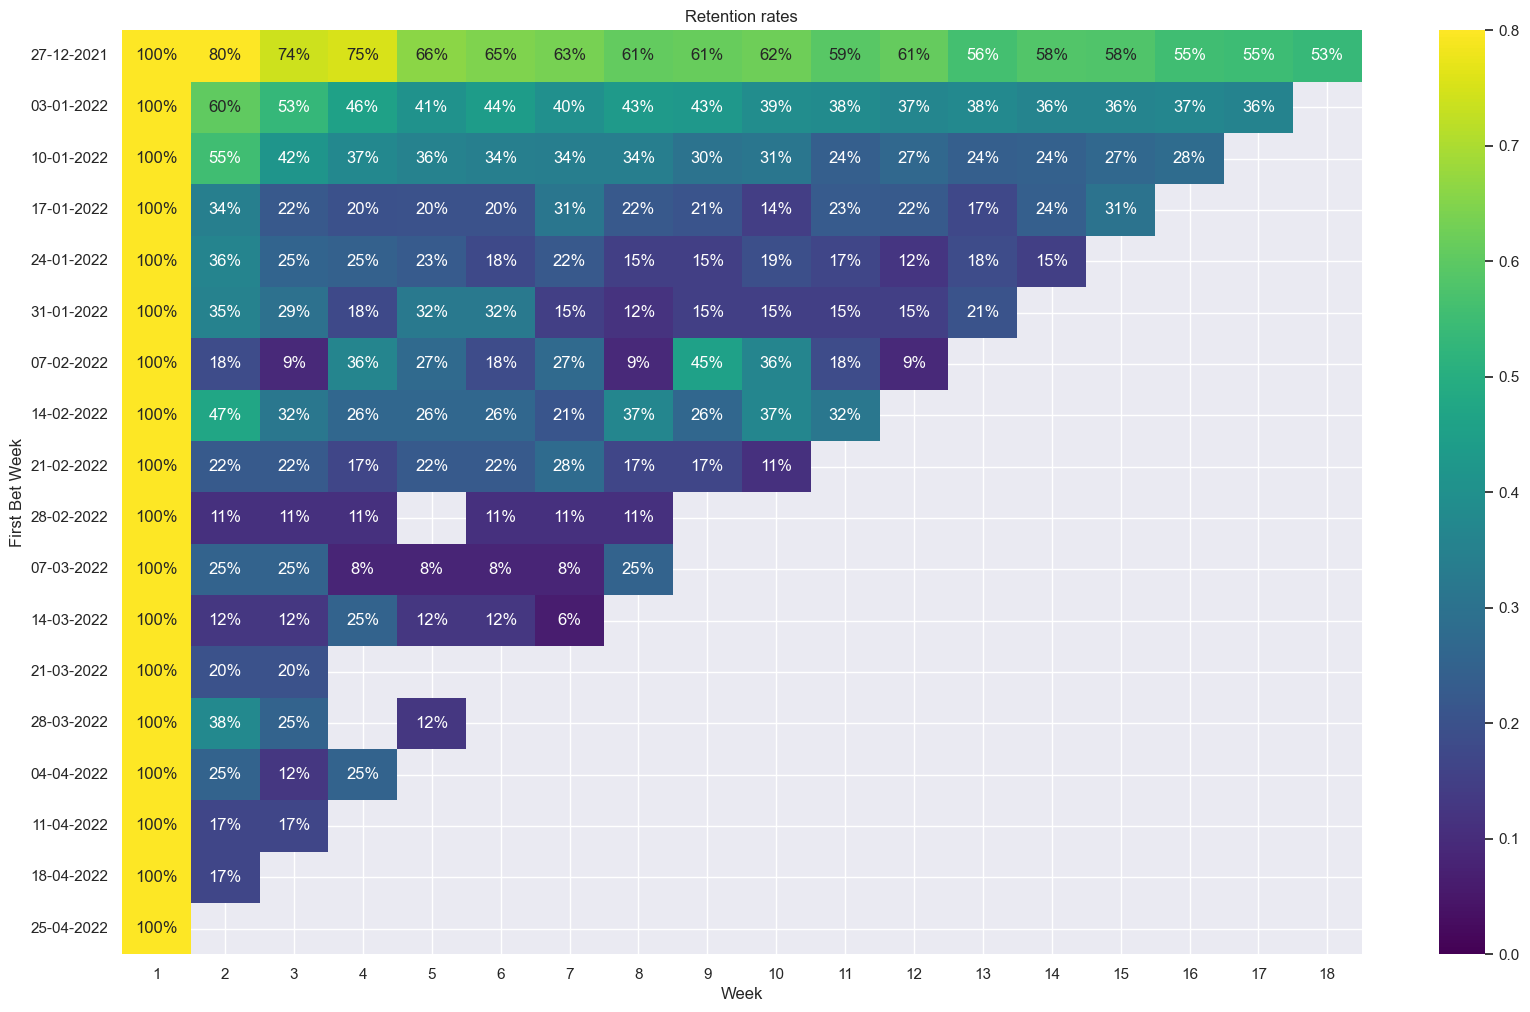

In [18]:
# Plotting the heatmap for retention rate
plt.figure(figsize=(20, 12))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.80,cmap = "viridis")
plt.xlabel("Week")
plt.ylabel("First Bet Week")
plt.show()

### What are the first & last touch points of all the customers in the system (eg: first channel, first deposit amount, last bet, last deposit, last channel etc.) Store the data for each customer at a customer level in a separate table and call it "first_touch_point" & "last_touch_point".

#### Note: We want you to extract the first entry in the system in the bets and deposits data for each customer (common) and put them in a separate table. So each customer has one unique entry with all their first touch points and similarly a second table with a unique entry for all their last touch points.

In [19]:
df1_new = df1.drop_duplicates(["PLAYER_ID", "TIMESTAMP"], keep = "first")

In [20]:
# Getting the first deposit and first channel for every customer
new_df1_1 = df1_new.sort_values('TIMESTAMP').groupby('PLAYER_ID').head(1)
new_df1_1.rename(columns = {"AMOUNT" : "FIRST_DEPOSIT_AMOUNT", "WEB_MOBILE_CHANNEL" : "FIRST_DEPOSIT_CHANNEL"}, inplace = True)

In [21]:
new_df1_1

,DOMAIN,FIRST_DEPOSIT_AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,FIRST_DEPOSIT_CHANNEL
509,BETBOO_TR,300.0,TRY,13326942,2022-01-01 00:03:00,2022-01-01,MOB
523,BETBOO_TR,70.0,TRY,14077577,2022-01-01 00:03:00,2022-01-01,MOB
514,BETBOO_TR,750.0,TRY,12189327,2022-01-01 00:04:00,2022-01-01,MOB
510,BETBOO_TR,37.0,TRY,14018017,2022-01-01 00:04:00,2022-01-01,MOB
499,BETBOO_TR,1100.0,TRY,9793903,2022-01-01 00:06:00,2022-01-01,MOB
...,...,...,...,...,...,...,...
32060,BETBOO_TR,1950.0,TRY,148174601,2022-01-31 20:43:00,2022-01-31,MOB
32412,BETBOO_TR,100.0,TRY,148175761,2022-01-31 21:59:00,2022-01-31,MOB
32104,BETBOO_TR,200.0,TRY,14235060,2022-01-31 22:06:00,2022-01-31,MOB
32153,BETBOO_TR,100.0,TRY,14318645,2022-01-31 22:15:00,2022-01-31,MOB


In [22]:
# Getting the last deposit and last channel for every customer
new_df1_2 = df1_new.sort_values('TIMESTAMP').groupby('PLAYER_ID').tail(1)
new_df1_2.rename(columns = {"AMOUNT" : "LAST_DEPOSIT_AMOUNT", "WEB_MOBILE_CHANNEL" : "LAST_DEPOSIT_CHANNEL"}, inplace = True)

In [23]:
new_df1_2

,DOMAIN,LAST_DEPOSIT_AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,LAST_DEPOSIT_CHANNEL
500,BETBOO_TR,25.0,TRY,13744966,2022-01-01 00:50:00,2022-01-01,MOB
660,BETBOO_TR,600.0,TRY,147695081,2022-01-01 03:51:00,2022-01-01,MOB
410,BETBOO_TR,100.0,TRY,147794781,2022-01-01 05:57:00,2022-01-01,MOB
733,BETBOO_TR,100.0,TRY,14438000,2022-01-01 07:46:00,2022-01-01,MOB
810,BETBOO_TR,100.0,TRY,147587671,2022-01-01 09:43:00,2022-01-01,MOB
...,...,...,...,...,...,...,...
31984,BETBOO_TR,50.0,TRY,147615021,2022-01-31 23:45:00,2022-01-31,MOB
32010,BETBOO_TR,2500.0,TRY,8375340,2022-01-31 23:49:00,2022-01-31,MOB
31998,BETBOO_TR,200.0,TRY,146159031,2022-01-31 23:53:00,2022-01-31,MOB
31965,BETBOO_TR,200.0,TRY,9792264,2022-01-31 23:56:00,2022-01-31,MOB


In [24]:
# Merging both new_df1_1 and new_df1_2 to get first and last deposit data for every customer
new_df1 = pd.merge(new_df1_1[["PLAYER_ID","FIRST_DEPOSIT_AMOUNT", "FIRST_DEPOSIT_CHANNEL"]],
                   new_df1_2[["PLAYER_ID","LAST_DEPOSIT_AMOUNT", "LAST_DEPOSIT_CHANNEL"]], on = "PLAYER_ID")

In [25]:
new_df1

,PLAYER_ID,FIRST_DEPOSIT_AMOUNT,FIRST_DEPOSIT_CHANNEL,LAST_DEPOSIT_AMOUNT,LAST_DEPOSIT_CHANNEL
0,13326942,300.0,MOB,250.0,MOB
1,14077577,70.0,MOB,70.0,MOB
2,12189327,750.0,MOB,100.0,MOB
3,14018017,37.0,MOB,28.0,MOB
4,9793903,1100.0,MOB,2000.0,MOB
...,...,...,...,...,...
2995,148174601,1950.0,MOB,1950.0,MOB
2996,148175761,100.0,MOB,100.0,MOB
2997,14235060,200.0,MOB,200.0,MOB
2998,14318645,100.0,MOB,100.0,MOB


In [26]:
df2.drop(["BET_WEEK", "FIRST_BET", "WEEK"], axis = 1, inplace = True)

In [27]:
df2_new = df2.drop_duplicates(["PLAYER_ID", "BET_DATE"], keep = "first")

In [28]:
# Getting the first bet and first bet channel for every customer
new_df2_1 = df2_new.sort_values('BET_DATE').groupby('PLAYER_ID').head(1)
new_df2_1.rename(columns = {"CASH_BET_AMOUNT" : "FIRST_BET_AMOUNT", "CHANNEL" : "FIRST_BET_CHANNEL"}, inplace = True)

In [29]:
new_df2_1

,BET_DATE,PLAYER_ID,PRODUCT,FIRST_BET_CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,FIRST_BET_AMOUNT,...,PRODUCT_VARIANT,EVENT,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST
156079,2022-01-01,14469090,SPORTSBOOK,MOBILE,LIVE,Football,6,L,LIVE,0.66284,...,Accumulator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000
155646,2022-01-01,12396364,SPORTSBOOK,MOBILE,LIVE,Football,2,L,LIVE,0.00000,...,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.28171
155665,2022-01-01,8288280,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,Single,Arsenal FC v Manchester City,England - Premier League,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,39/20,TRY,0.33142
155684,2022-01-01,14454800,SPORTSBOOK,WEB,LIVE,Football,1,L,LIVE,0.03314,...,Single,Arsenal FC v Manchester City,England - Premier League,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,12-May,TRY,0.00000
155697,2022-01-01,14382194,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,6.62837,...,Single,Arsenal FC v Manchester City,England - Premier League,Full Time Total Goals,Total Goals,Total Goals,Under,09-Oct,TRY,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77645,2022-04-21,14474750,SPORTSBOOK,MOBILE,PRE MATCH,Football,1,O,PRE MATCH,0.00000,...,Single,Arsenal v Manchester United,England - Premier League,Match Prices,Match Prices,Match Prices,Arsenal,01-Jan,TRY,0.00000
83416,2022-04-22,14166501,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,Single,Mbeya Kwanza FC v Coastal Union FC,Tanzania - Premier League,Match Prices,Match Prices,Match Prices,Coastal Union FC,14-Jan,TRY,3.13679
81172,2022-04-22,146391971,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,Single,Atletico Tucuman v Argentinos Juniors,Argentina - Copa de la Liga,2nd Half Result,2nd Half - Result,2nd Half - Result,Draw,15-Apr,TRY,0.62736
87900,2022-04-23,10177428,SPORTSBOOK,MOBILE,LIVE,Football,3,L,LIVE,0.31417,...,Treble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000


In [30]:
# Getting the last bet and last bet channel for every customer
new_df2_2 = df2_new.sort_values('BET_DATE').groupby('PLAYER_ID').tail(1)
new_df2_2.rename(columns = {"CASH_BET_AMOUNT" : "LAST_BET_AMOUNT", "CHANNEL" : "LAST_BET_CHANNEL"}, inplace = True)

In [31]:
new_df2_2

,BET_DATE,PLAYER_ID,PRODUCT,LAST_BET_CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,LAST_BET_AMOUNT,...,PRODUCT_VARIANT,EVENT,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST
155570,2022-01-01,147755791,SPORTSBOOK,MOBILE,LIVE,Multiples,2,W,LIVE,6.62837,...,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000
155551,2022-01-01,147798581,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,5.30269,...,Single,Arsenal FC v Manchester City,England - Premier League,Both Teams To Score,Both Teams To Score,Both Teams To Score,No,31/20,TRY,0.00000
156105,2022-01-01,9183909,SPORTSBOOK,MOBILE,LIVE,Football,2,L,LIVE,0.00000,...,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.33142
154512,2022-01-01,14442200,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,Single,Beitar Jerusalem U19 v Bnei Sakhnin U19,Israel - Youth,Match Prices,Match Prices,Match Prices,Beitar Jerusalem U19,15-Feb,TRY,0.33142
154716,2022-01-01,13770008,SPORTSBOOK,MOBILE,LIVE,Football,3,L,LIVE,0.00000,...,Treble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.33142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141501,2022-04-30,148051551,SPORTSBOOK,MOBILE,PRE MATCH,Football,6,L,PRE MATCH,23.31800,...,Accumulator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000
141518,2022-04-30,14275062,SPORTSBOOK,MOBILE,LIVE,Football,4,W,LIVE,8.93630,...,Accumulator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000
141524,2022-04-30,13115793,SPORTSBOOK,MOBILE,LIVE,Football,3,L,LIVE,2.55323,...,Treble,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.00000
141690,2022-04-30,13184516,SPORTSBOOK,MOBILE,LIVE,Football,1,W,LIVE,4.23134,...,Single,Central Coast Mariners v Western United,Australia - A-League,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Under,Jan-25,TRY,0.00000


In [32]:
# Merging both new_df2_1 and new_df2_2 to get first and last bet data for every customer
new_df2 = pd.merge(new_df2_1[["PLAYER_ID","FIRST_BET_AMOUNT", "FIRST_BET_CHANNEL"]],
                   new_df2_2[["PLAYER_ID","LAST_BET_AMOUNT", "LAST_BET_CHANNEL"]], on = "PLAYER_ID")

In [33]:
new_df2

,PLAYER_ID,FIRST_BET_AMOUNT,FIRST_BET_CHANNEL,LAST_BET_AMOUNT,LAST_BET_CHANNEL
0,14469090,0.66284,MOBILE,0.64379,WEB
1,12396364,0.00000,MOBILE,0.32131,MOBILE
2,8288280,0.00000,MOBILE,0.00000,MOBILE
3,14454800,0.03314,WEB,0.03106,WEB
4,14382194,6.62837,MOBILE,0.00000,MOBILE
...,...,...,...,...,...
2307,14474750,0.00000,MOBILE,0.31417,MOBILE
2308,14166501,0.00000,MOBILE,0.00000,MOBILE
2309,146391971,0.00000,MOBILE,0.00000,MOBILE
2310,10177428,0.31417,MOBILE,0.31417,MOBILE


In [34]:
first_touch_points = pd.merge(new_df1[["PLAYER_ID","FIRST_DEPOSIT_AMOUNT","FIRST_DEPOSIT_CHANNEL"]],
                              new_df2[["PLAYER_ID","FIRST_BET_AMOUNT","FIRST_BET_CHANNEL"]], on = "PLAYER_ID", how = "right")

In [35]:
# First touch point data for all the customers
first_touch_points

,PLAYER_ID,FIRST_DEPOSIT_AMOUNT,FIRST_DEPOSIT_CHANNEL,FIRST_BET_AMOUNT,FIRST_BET_CHANNEL
0,14469090,100.0,MOB,0.66284,MOBILE
1,12396364,100.0,MOB,0.00000,MOBILE
2,8288280,750.0,MOB,0.00000,MOBILE
3,14454800,100.0,MOB,0.03314,WEB
4,14382194,200.0,MOB,6.62837,MOBILE
...,...,...,...,...,...
2307,14474750,1100.0,MOB,0.00000,MOBILE
2308,14166501,750.0,MOB,0.00000,MOBILE
2309,146391971,200.0,MOB,0.00000,MOBILE
2310,10177428,100.0,MOB,0.31417,MOBILE


In [36]:
last_touch_points = pd.merge(new_df1[["PLAYER_ID","LAST_DEPOSIT_AMOUNT","LAST_DEPOSIT_CHANNEL"]],
                              new_df2[["PLAYER_ID","LAST_BET_AMOUNT","LAST_BET_CHANNEL"]], on = "PLAYER_ID", how = "right")

In [37]:
# Last touch point data for all the customers
last_touch_points

,PLAYER_ID,LAST_DEPOSIT_AMOUNT,LAST_DEPOSIT_CHANNEL,LAST_BET_AMOUNT,LAST_BET_CHANNEL
0,14469090,100.0,WEB,0.64379,WEB
1,12396364,100.0,MOB,0.32131,MOBILE
2,8288280,750.0,MOB,0.00000,MOBILE
3,14454800,100.0,MOB,0.03106,WEB
4,14382194,200.0,MOB,0.00000,MOBILE
...,...,...,...,...,...
2307,14474750,1000.0,MOB,0.31417,MOBILE
2308,14166501,750.0,MOB,0.00000,MOBILE
2309,146391971,200.0,MOB,0.00000,MOBILE
2310,10177428,100.0,MOB,0.31417,MOBILE


### Find out the Cash bet amount for each customer (i.e. at a customer level) and store the same in a separate table:

#### Day 1 to Day 3 i.e. Total Cash Bet amount in the first 3 days
#### Day 4 to Day 7 i.e. Total Cash Bet amount in the next 4 days and so on
#### Day 8 to Day 14
#### Day 15 to Day 28
#### Beyond Day 28 till date

#### Note: Day 1 (base date) in task Q3 is the first deposit date of the customer. Ideally, from the time the customer has placed his first deposit, we want to see the bet amount he's placing in his lifetime for the first 3 days, the next 4 days and so on as mentioned above.

#### Use the following column to calculate the first deposit date for a customer - TIMESTAMP_IU

In [38]:
# Creating a "FIRST_DEPOSIT_DATE" column to get the first deposit date
dff1 = df1.groupby("PLAYER_ID")["TIMESTAMP_IU"]
df1['FIRST_DEPOSIT_DATE'] = dff1.transform('min')
df1

,DOMAIN,AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,WEB_MOBILE_CHANNEL,FIRST_DEPOSIT_DATE
0,BETBOO_TR,100.0,TRY,14433780,2022-01-01 17:18:00,2022-01-01,MOB,2022-01-01
1,BETBOO_TR,1000.0,TRY,14195107,2022-01-01 17:50:00,2022-01-01,MOB,2022-01-01
2,BETBOO_TR,300.0,TRY,13712463,2022-01-01 17:16:00,2022-01-01,MOB,2022-01-01
3,BETBOO_TR,100.0,TRY,14194337,2022-01-01 17:53:00,2022-01-01,MOB,2022-01-01
4,BETBOO_TR,100.0,TRY,8367854,2022-01-01 17:02:00,2022-01-01,WEB,2022-01-01
...,...,...,...,...,...,...,...,...
32664,BETBOO_TR,5000.0,TRY,147050141,2022-01-31 10:33:00,2022-01-31,MOB,2022-01-01
32665,BETBOO_TR,50.0,TRY,147956811,2022-01-31 10:57:00,2022-01-31,MOB,2022-01-10
32666,BETBOO_TR,300.0,TRY,11620392,2022-01-31 10:07:00,2022-01-31,MOB,2022-01-03
32667,BETBOO_TR,100.0,TRY,147982961,2022-01-31 10:10:00,2022-01-31,MOB,2022-01-12


In [39]:
# Extracting only one row for each player to reduce the size of merged data in next step
new_df = df1.groupby("PLAYER_ID").head(1)
new_df

,DOMAIN,AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,WEB_MOBILE_CHANNEL,FIRST_DEPOSIT_DATE
0,BETBOO_TR,100.0,TRY,14433780,2022-01-01 17:18:00,2022-01-01,MOB,2022-01-01
1,BETBOO_TR,1000.0,TRY,14195107,2022-01-01 17:50:00,2022-01-01,MOB,2022-01-01
2,BETBOO_TR,300.0,TRY,13712463,2022-01-01 17:16:00,2022-01-01,MOB,2022-01-01
3,BETBOO_TR,100.0,TRY,14194337,2022-01-01 17:53:00,2022-01-01,MOB,2022-01-01
4,BETBOO_TR,100.0,TRY,8367854,2022-01-01 17:02:00,2022-01-01,WEB,2022-01-01
...,...,...,...,...,...,...,...,...
32564,BETBOO_TR,100.0,TRY,13509162,2022-01-31 09:57:00,2022-01-31,MOB,2022-01-31
32573,BETBOO_TR,500.0,TRY,13355725,2022-01-31 09:42:00,2022-01-31,MOB,2022-01-31
32585,BETBOO_TR,200.0,TRY,148170631,2022-01-31 13:29:00,2022-01-31,MOB,2022-01-31
32599,BETBOO_TR,500.0,TRY,145610911,2022-01-31 13:48:00,2022-01-31,MOB,2022-01-31


In [40]:
# merging new_df and df2 to work on bets data based on first deposit date
merged_df = pd.merge(new_df[["PLAYER_ID","FIRST_DEPOSIT_DATE"]], df2[["PLAYER_ID", "BET_DATE", "CASH_BET_AMOUNT"]], on = "PLAYER_ID", how = "right")

In [41]:
merged_df

,PLAYER_ID,FIRST_DEPOSIT_DATE,BET_DATE,CASH_BET_AMOUNT
0,13567011,2022-01-06,2022-04-11,0.93134
1,11472902,2022-01-01,2022-04-11,62.08963
2,14396942,2022-01-01,2022-04-11,1.55224
3,148063171,2022-01-24,2022-04-11,0.12418
4,12581903,2022-01-01,2022-04-11,31.04481
...,...,...,...,...
983037,11430549,2022-01-16,2022-04-10,0.31045
983038,11430549,2022-01-16,2022-04-10,0.31045
983039,11016063,2022-01-01,2022-04-10,3.10448
983040,13659322,2022-01-01,2022-04-10,31.04481


In [42]:
# Creating a column for first three days
merged_df['FIRST_THREE_DAYS'] = merged_df['FIRST_DEPOSIT_DATE'] + pd.DateOffset(days=2)

In [43]:
# Creating a column for 4 to 7 days
merged_df["4_TO_7_DAYS"] = merged_df['FIRST_THREE_DAYS'] + pd.DateOffset(days=4)

In [44]:
# # Creating a column for 8 to 15 days
merged_df['8_TO_15_DAYS'] = merged_df['4_TO_7_DAYS'] + pd.DateOffset(days=8)

In [45]:
# Creating a column for 16 to 28 days
merged_df['16_TO_28_DAYS'] = merged_df['8_TO_15_DAYS'] + pd.DateOffset(days=13)

In [46]:
# creating a column to get the most recent date in the df
merged_df["TILL_DATE"] = merged_df["BET_DATE"].max()

In [47]:
merged_df

,PLAYER_ID,FIRST_DEPOSIT_DATE,BET_DATE,CASH_BET_AMOUNT,FIRST_THREE_DAYS,4_TO_7_DAYS,8_TO_15_DAYS,16_TO_28_DAYS,TILL_DATE
0,13567011,2022-01-06,2022-04-11,0.93134,2022-01-08,2022-01-12,2022-01-20,2022-02-02,2022-04-30
1,11472902,2022-01-01,2022-04-11,62.08963,2022-01-03,2022-01-07,2022-01-15,2022-01-28,2022-04-30
2,14396942,2022-01-01,2022-04-11,1.55224,2022-01-03,2022-01-07,2022-01-15,2022-01-28,2022-04-30
3,148063171,2022-01-24,2022-04-11,0.12418,2022-01-26,2022-01-30,2022-02-07,2022-02-20,2022-04-30
4,12581903,2022-01-01,2022-04-11,31.04481,2022-01-03,2022-01-07,2022-01-15,2022-01-28,2022-04-30
...,...,...,...,...,...,...,...,...,...
983037,11430549,2022-01-16,2022-04-10,0.31045,2022-01-18,2022-01-22,2022-01-30,2022-02-12,2022-04-30
983038,11430549,2022-01-16,2022-04-10,0.31045,2022-01-18,2022-01-22,2022-01-30,2022-02-12,2022-04-30
983039,11016063,2022-01-01,2022-04-10,3.10448,2022-01-03,2022-01-07,2022-01-15,2022-01-28,2022-04-30
983040,13659322,2022-01-01,2022-04-10,31.04481,2022-01-03,2022-01-07,2022-01-15,2022-01-28,2022-04-30


In [48]:
# Creating a df to get the sum of bet amount for first three days for all customers
merged1 = merged_df[merged_df["BET_DATE"]<=merged_df["FIRST_THREE_DAYS"]].groupby("PLAYER_ID").sum()
merged1.columns = ["BET_AMOUNT_FIRST_THREE_DAYS"]

TypeError: datetime64 type does not support sum operations

In [ ]:
# Creating a df to get the sum of bet amount from 4th to 7th day for all customers
merged2 = merged_df[(merged_df["FIRST_THREE_DAYS"]<merged_df["BET_DATE"]) & (merged_df["BET_DATE"]<=merged_df["4_TO_7_DAYS"])].groupby("PLAYER_ID").sum()
merged2.columns = ["BET_AMOUNT_4_7_DAYS"]

In [ ]:
# Creating a df to get the sum of bet amount from 8th to 15th day for all customers
merged3 = merged_df[(merged_df["4_TO_7_DAYS"]<merged_df["BET_DATE"]) & (merged_df["BET_DATE"]<=merged_df["8_TO_15_DAYS"])].groupby("PLAYER_ID").sum()
merged3.columns = ["BET_AMOUNT_8_15_DAYS"]

In [ ]:
# Creating a df to get the sum of bet amount from 16th to 28th day for all customers
merged4 = merged_df[(merged_df["8_TO_15_DAYS"]<merged_df["BET_DATE"]) & (merged_df["BET_DATE"]<=merged_df["16_TO_28_DAYS"])].groupby("PLAYER_ID").sum()
merged4.columns = ["BET_AMOUNT_16_28_DAYS"]

In [ ]:
# Creating a df to get the sum of bet amount from 29th to the last day for all customers
merged5 = merged_df[(merged_df["16_TO_28_DAYS"]<merged_df["BET_DATE"]) & (merged_df["BET_DATE"]<=merged_df["TILL_DATE"])].groupby("PLAYER_ID").sum()
merged5.columns = ["BET_AMOUNT_AFTER_28_DAYS"]

In [ ]:
# First merging the first three dataframes as 'main' df
main = pd.merge(pd.merge(merged1,merged2,on='PLAYER_ID', how= "outer"),merged3,on='PLAYER_ID',how = "outer")

In [ ]:
# Merging the "main" df and other two dfs and getting the final df
datewise_bet_amount = pd.merge(pd.merge(main,merged4,on='PLAYER_ID', how= "outer"),merged5,on='PLAYER_ID',how = "outer")

In [ ]:
datewise_bet_amount

#### Checking the accuracy of the results in the next cells

In [ ]:
datewise_bet_amount.loc[14433780].sum()

In [ ]:
df2[(df2["PLAYER_ID"]==14433780)]["CASH_BET_AMOUNT"].sum()